In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
from pandas_datareader import data
from nsepy import get_history as gh
plt.style.use('fivethirtyeight') #setting matplotlib style
from pandas_datareader import data

In [2]:
stocksymbols = ['RELIANCE','CIPLA', 'MARUTI','HINDUNILVR','ICICIBANK','NESTLEIND','TCS','RAMCOCEM','NIFTYBEES','BANKBEES']
startdate = date(2021,1,1)
end_date = date.today()
# end_date = date(2022,2,17)
# stocksymbols = data.DataReader(['RELIANCE.NS', 'CIPLA.NS', 'MARUTI.NS', 'HINDUNILVR.NS'], 'yahoo', start='2016/01/01', end='2022/02/17')
# stocksymbols.head()
print(end_date)
print(f"You have {len(stocksymbols)} assets in your porfolio" )

2022-03-28
You have 10 assets in your porfolio


In [3]:
df = pd.DataFrame()
for i in range(len(stocksymbols)):
    data = gh(symbol=stocksymbols[i],start=startdate, end=(end_date))[['Symbol','Close']]
    data.rename(columns={'Close':data['Symbol'][0]},inplace=True)
    data.drop(['Symbol'], axis=1,inplace=True)
    if i == 0:
        df = data
    if i != 0:
        df = df.join(data)
df

,RELIANCE,CIPLA,MARUTI,HINDUNILVR,ICICIBANK,NESTLEIND,TCS,RAMCOCEM,NIFTYBEES,BANKBEES
Date,,,,,,,,,,
2021-01-01,1987.50,826.60,7691.30,2387.55,527.50,18450.70,2928.25,795.00,149.57,313.65
2021-01-04,1990.85,832.25,7702.30,2426.50,531.70,18377.95,3039.45,798.35,150.71,314.12
2021-01-05,1966.10,827.25,7655.45,2450.55,537.25,18558.25,3093.00,793.90,151.30,318.73
2021-01-06,1914.25,824.80,7628.60,2417.30,546.70,18515.25,3051.50,802.45,151.22,319.67
2021-01-07,1911.15,826.55,7566.05,2368.85,541.10,18127.30,3032.80,832.20,151.20,321.08
...,...,...,...,...,...,...,...,...,...,...
2022-03-22,2531.15,1032.60,7766.65,1993.50,718.20,17429.25,3700.95,739.05,187.34,365.95
2022-03-23,2539.20,1014.45,7644.85,1978.55,718.30,17344.20,3712.40,730.40,186.34,363.38
2022-03-24,2578.65,1029.00,7556.95,1965.90,704.20,17408.10,3749.85,729.55,186.09,358.20


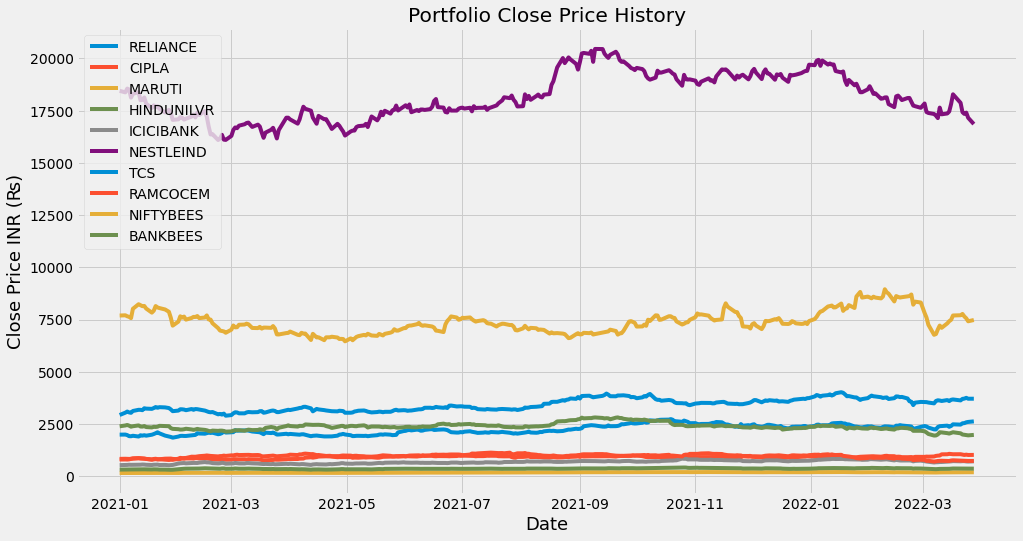

In [4]:
fig, ax = plt.subplots(figsize=(15,8))
for i in df.columns.values :
    ax.plot(df[i], label = i)
ax.set_title("Portfolio Close Price History")
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
ax.legend(df.columns.values , loc = 'upper left')
plt.show(fig)

In [5]:
correlation_matrix = df.corr(method='pearson')
correlation_matrix

,RELIANCE,CIPLA,MARUTI,HINDUNILVR,ICICIBANK,NESTLEIND,TCS,RAMCOCEM,NIFTYBEES,BANKBEES
RELIANCE,1.000000,0.442147,0.354725,0.175375,0.830444,0.683981,0.807170,0.023228,0.941941,0.830661
CIPLA,0.442147,1.000000,0.039661,0.157447,0.443938,0.354401,0.510697,-0.006749,0.521118,0.296318
MARUTI,0.354725,0.039661,1.000000,-0.254385,0.442765,0.176752,0.375844,-0.362416,0.365089,0.416736
HINDUNILVR,0.175375,0.157447,-0.254385,1.000000,0.086506,0.608197,0.316869,0.526537,0.259798,0.187423
ICICIBANK,0.830444,0.443938,0.442765,0.086506,1.000000,0.665549,0.782800,0.130194,0.937050,0.892330
NESTLEIND,0.683981,0.354401,0.176752,0.608197,0.665549,1.000000,0.794854,0.226731,0.786570,0.577618
TCS,0.807170,0.510697,0.375844,0.316869,0.782800,0.794854,1.000000,-0.082384,0.877404,0.640189
RAMCOCEM,0.023228,-0.006749,-0.362416,0.526537,0.130194,0.226731,-0.082384,1.000000,0.127216,0.242182
NIFTYBEES,0.941941,0.521118,0.365089,0.259798,0.937050,0.786570,0.877404,0.127216,1.000000,0.873760
BANKBEES,0.830661,0.296318,0.416736,0.187423,0.892330,0.577618,0.640189,0.242182,0.873760,1.000000


Correlation between Stocks in your portfolio


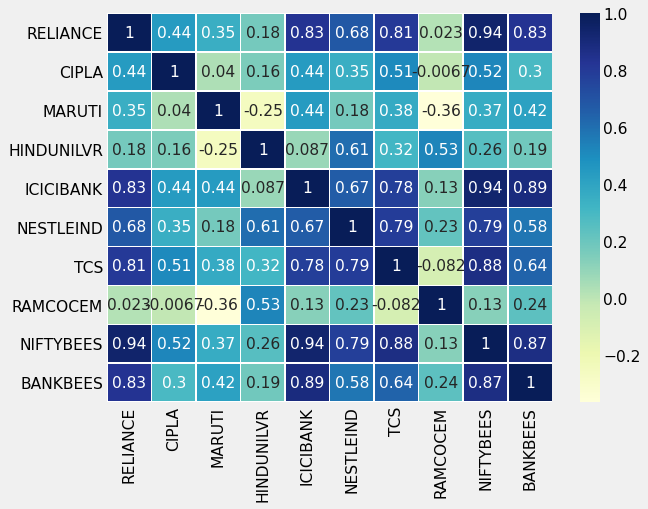

In [6]:
from matplotlib.pyplot import figure

#figure(figsize=(8, 6), dpi=80)

fig1 = plt.figure(figsize=(8, 6), dpi=80)
sb.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
cmap='YlGnBu', annot=True, linewidth=0.5)
print('Correlation between Stocks in your portfolio')
plt.show(fig1)


In [7]:
daily_simple_return = df.pct_change(1)
daily_simple_return.dropna(inplace=True)
daily_simple_return

,RELIANCE,CIPLA,MARUTI,HINDUNILVR,ICICIBANK,NESTLEIND,TCS,RAMCOCEM,NIFTYBEES,BANKBEES
Date,,,,,,,,,,
2021-01-04,0.001686,0.006835,0.001430,0.016314,0.007962,-0.003943,0.037975,0.004214,0.007622,0.001498
2021-01-05,-0.012432,-0.006008,-0.006083,0.009911,0.010438,0.009811,0.017618,-0.005574,0.003915,0.014676
2021-01-06,-0.026372,-0.002962,-0.003507,-0.013568,0.017590,-0.002317,-0.013417,0.010770,-0.000529,0.002949
2021-01-07,-0.001619,0.002122,-0.008199,-0.020043,-0.010243,-0.020953,-0.006128,0.037074,-0.000132,0.004411
2021-01-08,0.011799,0.014700,0.059324,0.009435,0.001756,0.009872,0.029049,0.023612,0.011111,0.002305
...,...,...,...,...,...,...,...,...,...,...
2022-03-22,0.025837,-0.016852,0.007929,-0.028130,0.010482,-0.025016,0.020473,-0.003976,0.010573,0.008460
2022-03-23,0.003180,-0.017577,-0.015682,-0.007499,0.000139,-0.004880,0.003094,-0.011704,-0.005338,-0.007023
2022-03-24,0.015536,0.014343,-0.011498,-0.006394,-0.019630,0.003684,0.010088,-0.001164,-0.001342,-0.014255


Daily simple returns


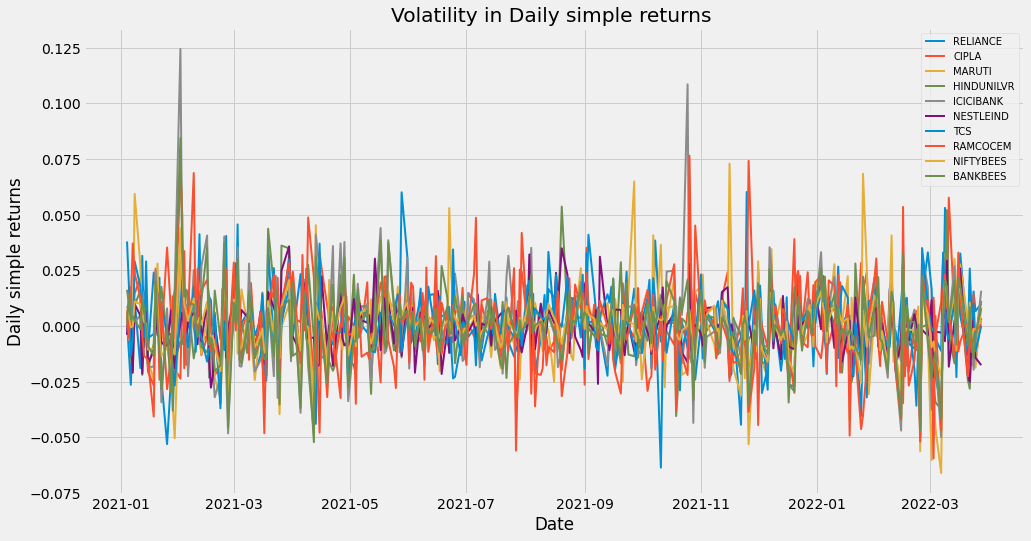

In [8]:
print('Daily simple returns')
fig, ax = plt.subplots(figsize=(15,8))


for i in daily_simple_return.columns.values :
    ax.plot(daily_simple_return[i], lw =2 ,label = i)


ax.legend( loc = 'upper right' , fontsize =10)
ax.set_title('Volatility in Daily simple returns ')
ax.set_xlabel('Date')
ax.set_ylabel('Daily simple returns')
plt.show(fig)

In [9]:
print('Average Daily returns(%) of stocks in your portfolio')
Avg_daily = daily_simple_return.mean()
print(Avg_daily*100)

Average Daily returns(%) of stocks in your portfolio
RELIANCE      0.104770
CIPLA         0.080073
MARUTI        0.008022
HINDUNILVR   -0.052998
ICICIBANK     0.116238
NESTLEIND    -0.022988
TCS           0.086847
RAMCOCEM     -0.010024
NIFTYBEES     0.076809
BANKBEES      0.055669
dtype: float64


<AxesSubplot:title={'center':'Risk Box Plot'}>

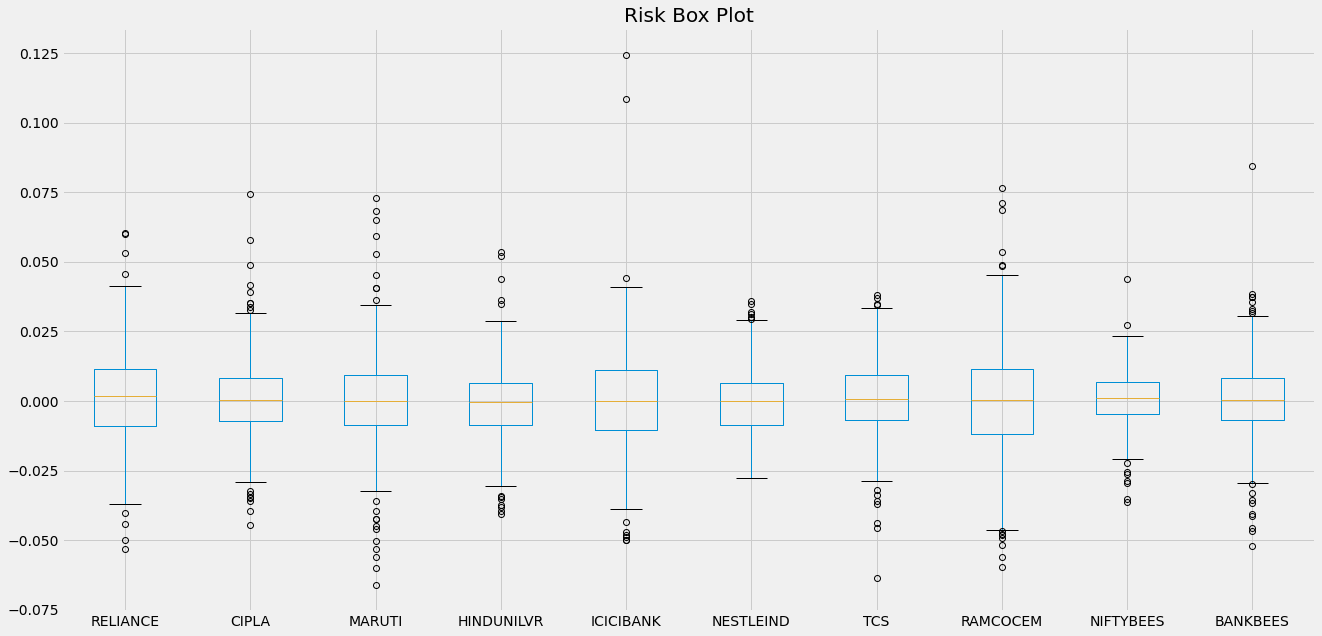

In [10]:
daily_simple_return.plot(kind = "box",figsize = (20,10), title = "Risk Box Plot")


In [11]:
print('Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.')
print(daily_simple_return.std() * np.sqrt(250) * 100)


Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.
RELIANCE      26.430408
CIPLA         24.655490
MARUTI        29.453176
HINDUNILVR    21.452434
ICICIBANK     30.789760
NESTLEIND     18.171705
TCS           21.724621
RAMCOCEM      30.577208
NIFTYBEES     15.423236
BANKBEES      23.195309
dtype: float64


In [12]:
Avg_daily / (daily_simple_return.std() * np.sqrt(250)) *100


RELIANCE      0.396398
CIPLA         0.324768
MARUTI        0.027238
HINDUNILVR   -0.247050
ICICIBANK     0.377522
NESTLEIND    -0.126502
TCS           0.399764
RAMCOCEM     -0.032782
NIFTYBEES     0.498006
BANKBEES      0.240002
dtype: float64

In [13]:
daily_cummulative_simple_return =(daily_simple_return+1).cumprod()
daily_cummulative_simple_return


,RELIANCE,CIPLA,MARUTI,HINDUNILVR,ICICIBANK,NESTLEIND,TCS,RAMCOCEM,NIFTYBEES,BANKBEES
Date,,,,,,,,,,
2021-01-04,1.001686,1.006835,1.001430,1.016314,1.007962,0.996057,1.037975,1.004214,1.007622,1.001498
2021-01-05,0.989233,1.000786,0.995339,1.026387,1.018483,1.005829,1.056262,0.998616,1.011566,1.016196
2021-01-06,0.963145,0.997822,0.991848,1.012460,1.036398,1.003499,1.042090,1.009371,1.011032,1.019193
2021-01-07,0.961585,0.999940,0.983715,0.992168,1.025782,0.982472,1.035704,1.046792,1.010898,1.023689
2021-01-08,0.972931,1.014638,1.042074,1.001529,1.027583,0.992171,1.065790,1.071509,1.022130,1.026048
...,...,...,...,...,...,...,...,...,...,...
2022-03-22,1.273535,1.249214,1.009797,0.834956,1.361517,0.944639,1.263878,0.929623,1.252524,1.166746
2022-03-23,1.277585,1.227256,0.993961,0.828695,1.361706,0.940029,1.267788,0.918742,1.245838,1.158553
2022-03-24,1.297434,1.244858,0.982532,0.823396,1.334976,0.943493,1.280577,0.917673,1.244167,1.142037


Cummulative Returns


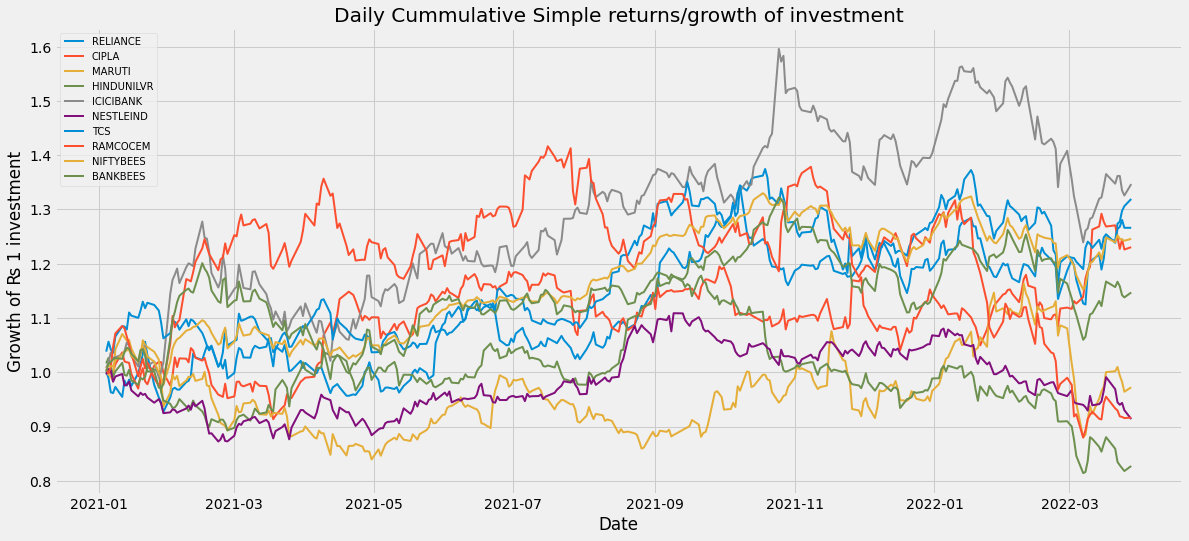

In [14]:
#visualize the daily cummulative simple return
print('Cummulative Returns')
fig, ax = plt.subplots(figsize=(18,8))

for i in daily_cummulative_simple_return.columns.values :
    ax.plot(daily_cummulative_simple_return[i], lw =2 ,label = i)

ax.legend( loc = 'upper left' , fontsize =10)
ax.set_title('Daily Cummulative Simple returns/growth of investment')
ax.set_xlabel('Date')
ax.set_ylabel('Growth of ₨ 1 investment')
plt.show(fig)


In [15]:
#pip install pyportfolioopt

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
from nsepy import get_history as gh
plt.style.use('fivethirtyeight')

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import  risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices


In [17]:
mean = expected_returns.mean_historical_return(df)

S = risk_models.sample_cov(df) # for sample covariance matrix
S

,RELIANCE,CIPLA,MARUTI,HINDUNILVR,ICICIBANK,NESTLEIND,TCS,RAMCOCEM,NIFTYBEES,BANKBEES
RELIANCE,0.070416,-0.002786,0.021383,0.015380,0.029067,0.011143,0.018726,0.030776,0.028211,0.030185
CIPLA,-0.002786,0.061276,0.000435,0.006517,-0.002408,0.002250,0.009931,0.006979,0.003320,-0.000861
MARUTI,0.021383,0.000435,0.087443,0.017642,0.032008,0.010843,0.013428,0.030279,0.023601,0.031192
HINDUNILVR,0.015380,0.006517,0.017642,0.046389,0.011673,0.020727,0.017327,0.014290,0.012998,0.011501
ICICIBANK,0.029067,-0.002408,0.032008,0.011673,0.095559,0.008696,0.015241,0.035496,0.034465,0.062763
NESTLEIND,0.011143,0.002250,0.010843,0.020727,0.008696,0.033285,0.012013,0.016130,0.009789,0.007495
TCS,0.018726,0.009931,0.013428,0.017327,0.015241,0.012013,0.047573,0.016410,0.017599,0.012811
RAMCOCEM,0.030776,0.006979,0.030279,0.014290,0.035496,0.016130,0.016410,0.094245,0.026910,0.032492
NIFTYBEES,0.028211,0.003320,0.023601,0.012998,0.034465,0.009789,0.017599,0.026910,0.023978,0.031009
BANKBEES,0.030185,-0.000861,0.031192,0.011501,0.062763,0.007495,0.012811,0.032492,0.031009,0.054233


Covariance between daily simple returns of stocks in your portfolio


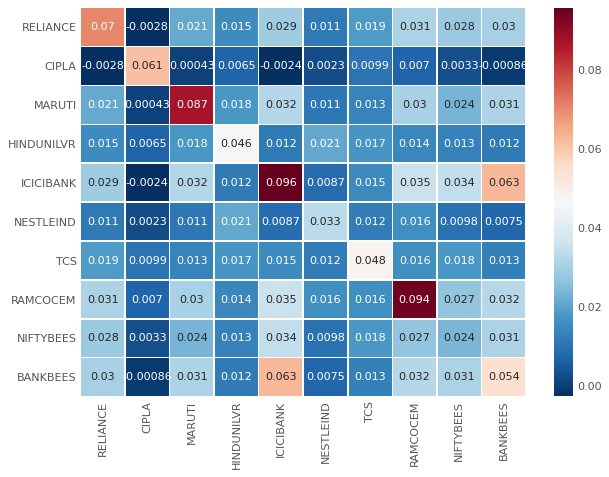

In [18]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(8, 6), dpi=80)
sb.heatmap(S,xticklabels=S.columns, yticklabels=S.columns,
cmap='RdBu_r', annot=True, linewidth=0.5)
print('Covariance between daily simple returns of stocks in your portfolio')
plt.show(fig)

In [19]:
import matplotlib.pyplot as plt
import numpy as np

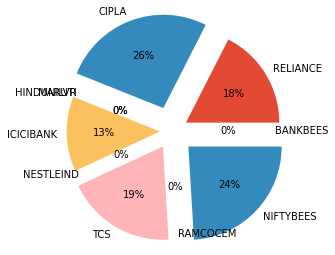

Portfolio Allocation


In [20]:
ef = EfficientFrontier(mean,S)
weights = ef.max_sharpe() #for maximizing the Sharpe ratio #Optimization
cleaned_weights = ef.clean_weights() #to clean the raw weights
# Get the Keys and store them in a list
labels = list(cleaned_weights.keys())
# Get the Values and store them in a list
values = list(cleaned_weights.values())
fig, ax = plt.subplots()
plt.pie(values,labels=labels,autopct='%1.0f%%', explode = values)
plt.show() 
# ax.pie(values, labels=labels,autopct='%1.0f%%')
print('Portfolio Allocation')
plt.show(fig)

In [21]:
ef.portfolio_performance(verbose=True)

Expected annual return: 21.9%
Annual volatility: 14.7%
Sharpe Ratio: 1.36


(0.21946321410227423, 0.1470295991637178, 1.3566194510274865)

In [22]:
portfolio_amount = float(input("Enter the amount you want to invest: "))
if portfolio_amount != '' :
    # Get discrete allocation of each share per stock

    latest_prices = get_latest_prices(df)
    weights = cleaned_weights
    discrete_allocation = DiscreteAllocation(weights, latest_prices , total_portfolio_value = int(portfolio_amount))
    allocation , leftover = discrete_allocation.lp_portfolio()

    discrete_allocation_list = []


    for symbol in allocation:
        discrete_allocation_list.append(allocation.get(symbol))


    portfolio_df = pd.DataFrame(columns =['Ticker' , 'Number of stocks to buy'])

    portfolio_df['Ticker'] = allocation
    portfolio_df['Number of stocks to buy'] = discrete_allocation_list
    print('Number of stocks to buy with the amount of ₨ ' + str(portfolio_amount))
    print(portfolio_df)
    print('Funds remaining with you will be: ₨' , int(leftover))


Enter the amount you want to invest: 100000
Number of stocks to buy with the amount of ₨ 100000.0
              Ticker  Number of stocks to buy
RELIANCE    RELIANCE                        7
CIPLA          CIPLA                       26
ICICIBANK  ICICIBANK                       18
TCS              TCS                        5
NIFTYBEES  NIFTYBEES                      128
Funds remaining with you will be: ₨ 27


In [23]:
#conda install -c conda-forge cvxopt